In [1]:
%pylab
%matplotlib inline

params = {'text.usetex' : True,
          'font.size' : 18,
          'font.family' : 'lmodern',
          'text.latex.unicode' : True}
rcParams.update(params)

from IPython.display import display, HTML

CSS = """
.output {
    align-items: center;
}
"""

HTML('<style>{}</style>'.format(CSS))

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


<center><h1>Modal Decomposition</h1></center>

<p><center>SVD, POD et DMD</center></p>
<p><center>Jean-Christophe Loiseau, MdC, Arts et Métiers ParisTech</center></p>

The aim of modal decomposition is to decompose the time-evolution of a quantity $u({\bf x}, t)$ as

$$
u({\bf x}, t) = \sum \phi_i({\bf x}) a_i(t)
$$

The choice of modal basis determine the physical meaning of the topos ${\bf \phi}({\bf x})$ and the chronos $a(t)$.

A number of different modal decompositions exists in the literature :
    
- Fourier decomposition,
- Proper Orthogonal decomposition,
- Balanced POD,
- Dynamic modes decomposition,
- ...

The choice depends on the goal and the personal preferences of the user.

Modal decomposition can serve different purposes :

- Extraction of coherent structures for physical analysis,
- Low-dimensional representation of the data for reduced-order modeling,
- Simplified expression of the governing equations of the system,
- ...

In any case, modal decomposition often relies on advanced linear algebra.

<center><h2>Singular Value Decomposition (SVD)</h2></center>

Stewart (*Comput. Sci. Engrg.*, **2**: 50-59, 2000) has listed the *big six matrix decompositions* :

- Cholesky decomposition
- pivoted LU decomposition
- QR algorithm
- Spectral decomposition
- Schur decomposition
- <font color='firebrick'> Singular Value Decomposition</font>

Given the matrix ${\bf A} \in \mathbb{C}^{m \times n}$, there exists a factorization of ${\bf A}$ such that

$${\bf A} = {\bf U \Sigma V}^H$$

where

- ${\bf U}$ is a $m \times m$ *unitary* matrix, *i.e.* ${\bf U}^H {\bf U} = {\bf I}$,
- ${\bf \Sigma}$ is *diagonal* $m \times m$ matrix with non-negative real numbers $\sigma$ on the diagonal,
- ${\bf V}^H$ is a $n \times n$ *unitary* matrix.

The first $p = \min(m,n)$ columns of ${\bf U}$ and ${\bf V}$ are known as the *left* and *right* singular vectors of ${\bf A}$. They are related by

$${\bf Av}_i = \sigma_i {\bf u}_i$$

and

$${\bf A}^H {\bf u}_i = \sigma_i {\bf v}_i$$

<center><h3>Properties of the SVD</h3></center>

Let us assume that the matrices ${\bf U}$, ${\bf \Sigma}$ and ${\bf V}$ are block-partitioned as

$$
{\bf U} = \left[ {\bf U}_1 \quad {\bf U}_2 \right], \quad {\bf \Sigma} = \begin{bmatrix} \Sigma_1 & 0 \\ 0 & \Sigma_2 \end{bmatrix} \in \mathbb{R}^{m \times n}, \quad {\bf V} = \left[ {\bf V}_1 \quad {\bf V}_2 \right]
$$

with

$$
{\bf \Sigma}_1 = \begin{bmatrix} \sigma_1 & ~ & ~ \\ ~ & \ddots & ~ \\ ~ & ~ & \sigma_r \end{bmatrix} > {\bf 0}, \quad {\bf \Sigma}_2 = {\bf 0} \in \mathbb{R}^{(m-r) \times (n-r)}
$$

One can show that :
    
- Rank ${\bf A} = r$,
- Dyadic decomposition of ${\bf A}$: ${\bf A} = \sigma_1 {\bf u}_1 {\bf v}_1^H + \sigma_2 {\bf u}_2 {\bf v}_2^H + \cdots + \sigma_r {\bf u}_r {\bf v}_r^H$
- The Frobenius norm of ${\bf A}$ is $\| {\bf A} \|_F = \sqrt{\sigma_1^2 + \cdots + \sigma_r^2}$

<center><h3>Connections with eigenvalue decomposition</h3></center>

Starting from ${\bf A} = {\bf U \Sigma V}^H$, one can write

$$
\begin{align}
{\bf A}^H {\bf A} & = {\bf V \Sigma U}^H {\bf U \Sigma V}^H \\
~ & = {\bf V \Sigma}^2 {\bf V}^H
\end{align}
$$

One can also write

$$
{\bf A} {\bf A}^H = {\bf U \Sigma}^2 {\bf U}^H
$$

${\bf U}$ and ${\bf V}$ are the eigenvectors of ${\bf A A}^H$ and ${\bf A}^H{\bf A}$, respectively.

<center><h3>Applications of SVD</h3></center>

SVD is used in a broad range of applications :

- Data compression
- Computation of the Moore-Penrose pseudo-inverse
- Solving ${\bf Ax} = {\bf 0}$
- Low-rank matrix approximation
- Statistics
- ...

<center><h3>Example: Low-rank approximation</h3></center>

Given the matrix ${\bf A}$ with rank ${\bf A} = n$, the low-rank approximation problem reads

$$
\begin{align}
\min_{\hat{\bf A}} \| {\bf A} - \hat{\bf A} \|^2_F \\
\text{subject to rank } \hat{\bf A} \le r.
\end{align}
$$

Given the singular value decomposition ${\bf A} = {\bf U \Sigma V}^H$ with

$$
{\bf U} = \left[ {\bf U}_1 \quad {\bf U}_2 \right], \quad {\bf \Sigma} = \begin{bmatrix} \Sigma_1 & 0 \\ 0 & \Sigma_2 \end{bmatrix}, \quad {\bf V} = \left[ {\bf V}_1 \quad {\bf V}_2 \right]
$$

and ${\bf U}_1  \in \mathbb{R}^{m \times r}$, ${\bf V} \in \mathbb{R}^{n \times r}$ and ${\bf \Sigma}_1  \in \mathbb{R}^{r \times r}$.

The rank-r matrix obtained from the truncated singular value decomposition ${\bf X} = {\bf U}_1 {\bf \Sigma}_1 {\bf V}_1^H$ is such that

$$
\begin{align}
\| {\bf A} - {\bf X} \|_F^2 & = \min_{\hat{\bf A}} \| {\bf A} - \hat{\bf A} \|_F^2 \\
~ & = \sigma_{r+1}^2 + \cdots + \sigma_n^2
\end{align}
$$

By choosing an appropriate $r$, one can control the error made by the low-rank approximation.

<center><h2>Proper Orthogonal Decomposition (POD)</h2></center>

**Note:** Proper Orthogonal Decomposition is also known as :

- Principal Component Analysis (PCA) in statistical analysis,
- Kosambi-Karhunen–Loève transform (KLT) in signal processing,
- Empirical orthogonal functions (EOF) in meteorological science, 
- ...

POD being closely related to correlations, one can choose :

- POD based on the spatial correlation matrix,
- POD based on the temporal correlation matrix.

Only the latter will be explicited in this presentation.

Let us consider a collection of snapshots of the time-evolution of our system

$$
{\bf X} = \begin{bmatrix}
            q({\bf x}, t_1) & q({\bf x}, t_2) & \cdots & q({\bf x}, t_n)
          \end{bmatrix}
$$

The aim of POD analysis is to identify a set of structures that provide an optimal low-rank approximation of ${\bf X}$. In this sense, POD is closely related to SVD.

Before moving to the actual POD analysis, a few remarks are in order :
    
- From a statistical point of view, one needs to center the data, *i.e.* the time-evolution needs have zero-mean.

The idea of snapshots-based POD is to write the topos ${\bf \phi}({\bf x})$ as a linear combination of the input snapshots

$$
\begin{align}
{\bf \phi}_j({\bf x}) & = \sum_i q({\bf x}, t_i) v_j(t_i) \\
~ & = {\bf Xv}_j
\end{align}
$$

with

$$
\begin{align}
{\bf \phi}_i^T {\bf \phi}_j & = \delta_{ij} \\
~ & = {\bf v}^T_i {\bf X}^T {\bf X v}_j
\end{align}
$$

where ${\bf X}^T {\bf X}$ is the s.p.d. time-correlation matrix.

The ${\bf v}_i$ are solution to the eigenproblem

$$\lambda_i {\bf v}_i = {\bf X}^T {\bf Xv}_i$$

Because ${\bf X}^T {\bf X}$ is a s.p.d. matrix, its eigenvectors form an orthonormal set of vectors. It also clear that ${\bf v}_i$ is the $i$-th right singular vector of ${\bf X}$.

The normalization condition imposes

$$
\begin{align}
{\bf v}^T_i {\bf v}_j & = \displaystyle \frac{1}{\lambda_j} \delta_{ij} \\
\end{align}
$$

${\bf v}_i$ and ${\bf v}_j$ have zero-mean and are un-correlated (which does not mean they are independent!).

In [2]:
from moviepy.editor import *
clip = VideoFileClip("./Movie/output.mp4")

<center><h3>Example : the 2D cylinder flow</h3></center>

Let us consider the two-dimensional cylinder flow at $Re=100$, a canonical example of fluid dynamics.

In [3]:
ipython_display(clip, width=750, autoplay=1, loop=1)

100%|█████████▉| 1500/1501 [00:06<00:00, 248.42it/s]


In [4]:
#--> Import miscellaneous python stuff.
from scipy import misc
import glob

#--> Import all the velocity magnitude snapshots.
snapshots = []

for image_path in glob.glob("Movie/*png"):
    snapshots.append(misc.imread(image_path, mode='F'))
    
snapshots = asarray(snapshots)[:, 16:-16, 16:-16]

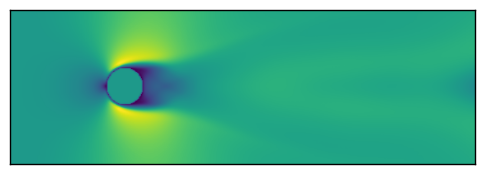

In [5]:
#--> Compute the mean.
mean = snapshots.mean(axis=0)

#--> Plot the corresponding field.
imshow(mean, cmap=plt.cm.viridis) ; plt.axes().xaxis.set_visible(False) ; plt.axes().yaxis.set_visible(False) ;

In [6]:
#--> Center the data matrix.
X = (snapshots - mean).reshape((len(snapshots), mean.size)).T

#--> SVD-based POD.
from scipy.linalg import svd, diagsvd
u, s, vh = svd(X, full_matrices=False)

In [7]:
explained = zeros_like(s)
explained[0] = s[0]
for i in range(s.size-1):
    explained[i+1] = sqrt((s[:i+2]**2).sum())
explained /= sqrt((s**2).sum())
explained *= 100.

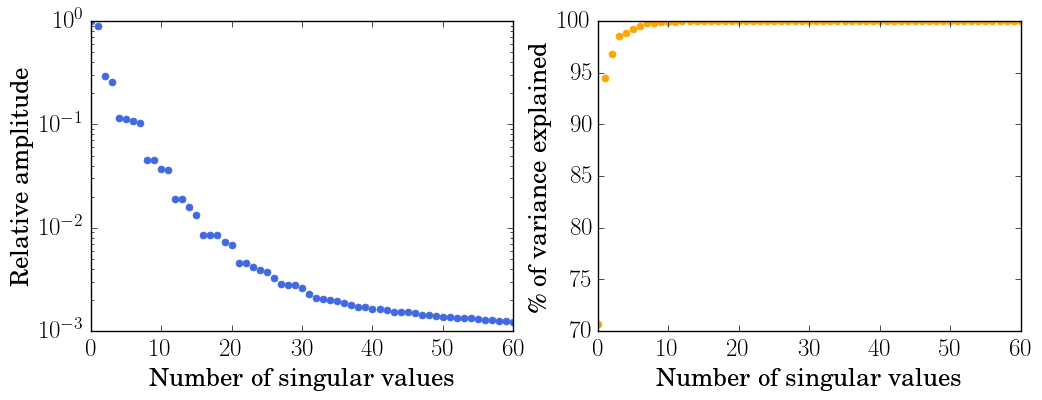

In [8]:
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(12, 4)) ;
ax[0].semilogy(s/s.max(), '.', color='royalblue', ms=10) ; ax[0].set_xlim(0, 60) ; ax[0].set_ylabel('Relative amplitude') ; ax[0].set_xlabel('Number of singular values') ; ax[0].set_ylim(10**-3, 1) ; ax[0].set_yticks([10**-3, 10**-2, 10**-1, 1])
ax[1].plot(explained, '.', color='orange', ms=10) ; ax[1].set_ylabel('\% of variance explained') ; ax[1].set_xlabel('Number of singular values') ;

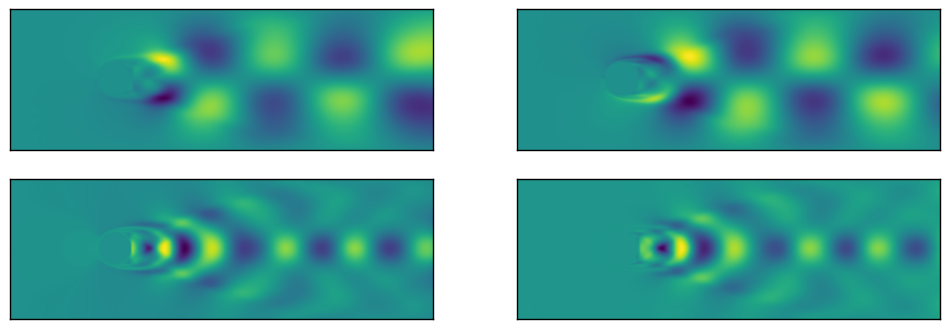

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(12, 4))
ax[0, 0].imshow(u[:, 0].reshape(mean.shape), cmap=plt.cm.viridis) ; ax[0, 0].xaxis.set_visible(False) ; ax[0, 0].yaxis.set_visible(False)
ax[0, 1].imshow(u[:, 1].reshape(mean.shape), cmap=plt.cm.viridis) ; ax[0, 1].xaxis.set_visible(False) ; ax[0, 1].yaxis.set_visible(False)
ax[1, 0].imshow(u[:, 2].reshape(mean.shape), cmap=plt.cm.viridis) ; ax[1, 0].xaxis.set_visible(False) ; ax[1, 0].yaxis.set_visible(False)
ax[1, 1].imshow(u[:, 3].reshape(mean.shape), cmap=plt.cm.viridis) ; ax[1, 1].xaxis.set_visible(False) ; ax[1, 1].yaxis.set_visible(False)

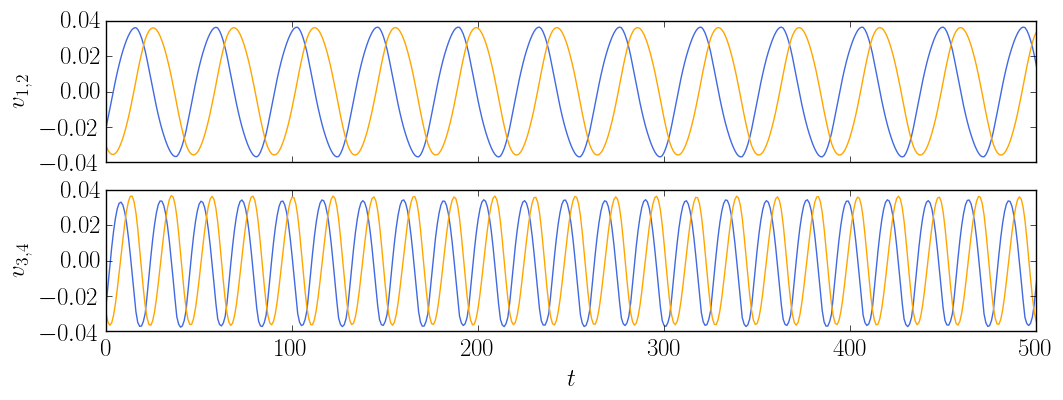

In [10]:
fig, ax = plt.subplots(2, 1, figsize=(12, 4), sharex=True, sharey=True)
ax[0].plot(vh[0, :], color='royalblue') ; ax[0].plot(vh[1, :], color='orange') ; ax[0].set_xlim(0, 500) ; ax[0].set_ylabel('$v_{1, 2}$')
ax[1].plot(vh[2, :], color='royalblue') ; ax[1].plot(vh[3, :], color='orange') ; ax[1].locator_params(axis='y', nbins=5) ; ax[1].set_xlabel('$t$') ; ax[1].set_ylabel('$v_{3, 4}$') ;

In [11]:
p0 = abs(np.fft.fft(np.sin(vh[0, :])))
p1 = abs(np.fft.fft(np.sin(vh[1, :])))
p2 = abs(np.fft.fft(np.sin(vh[2, :])))
p3 = abs(np.fft.fft(np.sin(vh[3, :])))

f = np.fft.fftfreq(vh.shape[1])

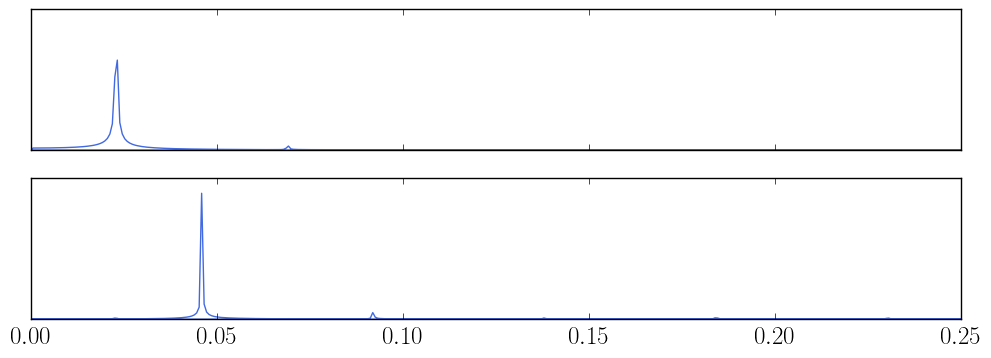

In [12]:
fig, ax = plt.subplots(2, 1, figsize=(12, 4), sharex=True, sharey=True)
ax[0].plot(f, p0, color='royalblue') ; ax[0].set_xlim(0, 0.25)
ax[1].plot(f, p2, color='royalblue') ; ax[1].set_yticks([]) ;

Although the POD modes are orthogonal one to another, their time-evolution is multi-frequential :

- Difficult to extract the coherent structures beating at a given frequency.
- Difficulty to interpret the results in certain cases.

In [13]:
#--> Import all the velocity magnitude snapshots.
ocf = []

for image_path in glob.glob("OCF/*png"):
    ocf.append(misc.imread(image_path, mode='F'))

<center><h3>Example : the 2D shear driven cavity flow</h3></center>

<center><img src='OCF/visit0001.png', width=900px></center>

<center><img src='OCF/visit0002.png', width=900px></center>

<center><img src='OCF/visit0003.png', width=900px></center>

<center><img src='OCF/visit0004.png', width=900px></center>

In [14]:
#--> Load the chronos dataset for the OCF flow at Re=7500.
vh = loadtxt('OCF/POD_coefficients.dat')

#--> Perform FFT.
n = 1024
p0 = abs(np.fft.fft(np.sin(vh[0, :])))
p1 = abs(np.fft.fft(np.sin(vh[2, :])))
p2 = abs(np.fft.fft(np.sin(vh[4, :])))
p3 = abs(np.fft.fft(np.sin(vh[6, :])))

f = np.fft.fftfreq(vh.shape[1])


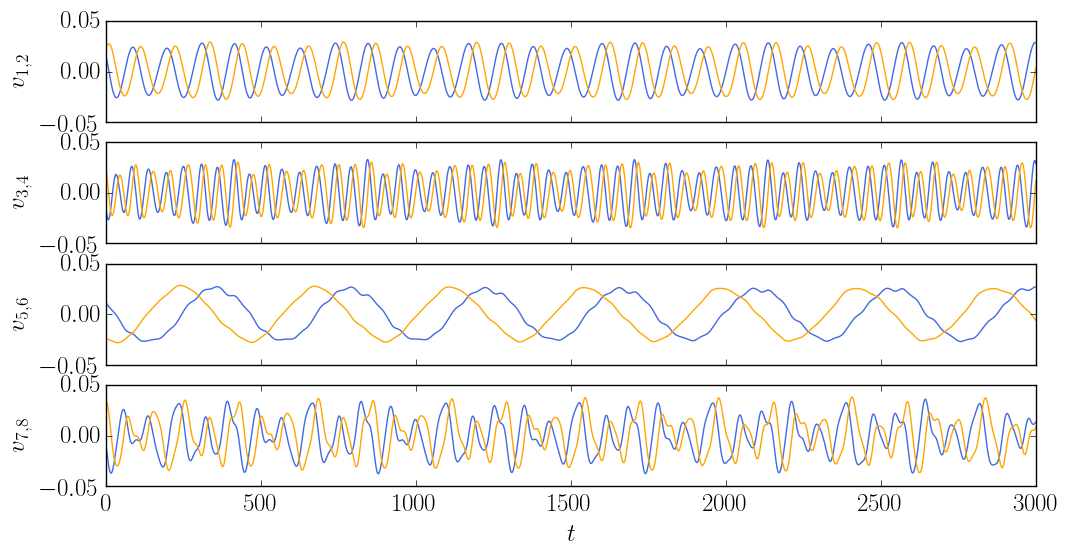

In [15]:
fig, ax = plt.subplots(4, 1, figsize=(12, 6), sharex=True, sharey=True)
ax[0].plot(vh[0, :], color='royalblue') ; ax[0].plot(vh[1, :], color='orange') ; ax[0].set_xlim(0, 3000) ; ax[0].set_ylabel('$v_{1, 2}$') ; ax[1].plot(vh[2, :], color='royalblue') ; ax[1].plot(vh[3, :], color='orange') ; ax[1].locator_params(axis='y', nbins=3) ; ax[1].set_ylabel('$v_{3, 4}$') ;
ax[2].plot(vh[4, :], color='royalblue') ; ax[2].plot(vh[5, :], color='orange') ; ax[2].locator_params(axis='y', nbins=3) ; ax[2].set_ylabel('$v_{5, 6}$') ; ax[3].plot(vh[6, :], color='royalblue') ; ax[3].plot(vh[7, :], color='orange') ; ax[3].locator_params(axis='y', nbins=3) ; ax[3].set_xlabel('$t$') ; ax[3].set_ylabel('$v_{7, 8}$') ;

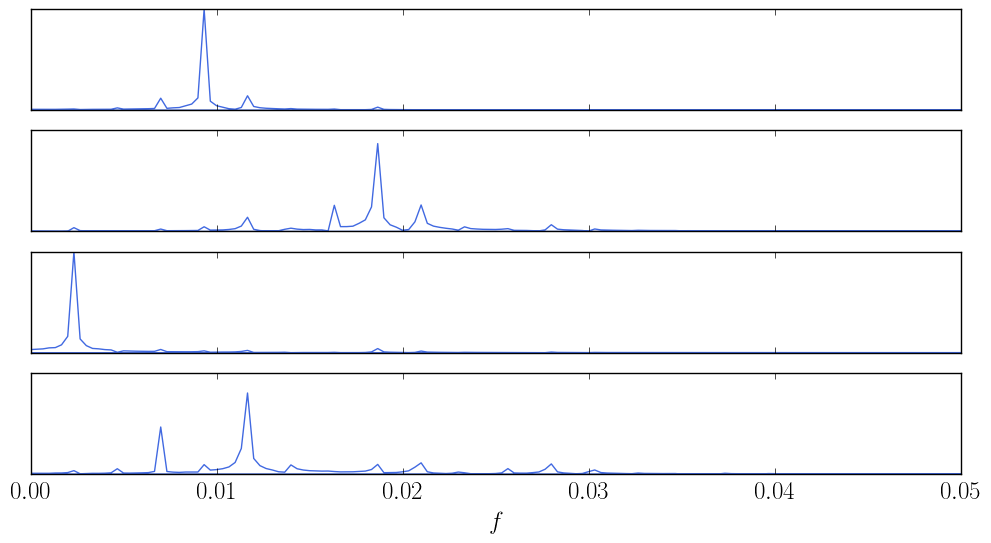

In [16]:
fig, ax = plt.subplots(4, 1, figsize=(12, 6), sharex=True, sharey=True)
ax[0].plot(f, p0, color='royalblue')  ; ax[0].set_xlim(0, 0.05) ; ax[1].plot(f, p1, color='royalblue') ;  ax[1].set_yticks([]) ; ax[3].set_xlabel('$f$')
ax[2].plot(f, p2, color='royalblue')  ; ax[3].plot(f, p3, color='royalblue') ;  

<center><h2>Dynamic Mode Decomposition</h2></center>

Dynamic mode decomposition (DMD) is a dimensionality reduction algorithm developed by Peter Schmid in 2008. Numerous variants of DMD are existing and only the original one will be presented during this course.

<center><h3>Koopman analysis</h3></center>

Let us assume that our (non-linear) snapshots are generated by a time-discrete linear dynamical system

$$
{\bf x}_{i+1} = {\bf Ax}_i
$$

Although this is a very strong assumption, it is related to the concept of Koopman operator which is beyond the scope of this course.

One way to characterise this time-discrete linear system is to look at the spectral decomposition of the matrix ${\bf A}$. This matrix is however *a priori* unknown!

<br/>

<center>How should we proceed?</center>

Let us consider the following two matrices

$$
{\bf X} = \begin{bmatrix} {\bf x}_0 & {\bf x}_1 & \cdots & {\bf x}_{n} \end{bmatrix}
$$

and 

$$
{\bf Y} = \begin{bmatrix} {\bf x}_1 & {\bf x}_2 & \cdots & {\bf x}_{n+1} \end{bmatrix}
$$

These two matrices are related as follows

$$
{\bf Y} = {\bf AX}
$$

*i.e.* ${\bf Y}$ is time-shifted version of ${\bf X}$.

If a sufficiently large number of snapshots is considered, it is reasonnable to assume at some point that

$$
\begin{align}
{\bf x}_{n+1} & = \sum_{j=1}^n  c_j {\bf x}_j + {\bf r} \\
~ &= {\bf Xc} + {\bf r}
\end{align}
$$

where the coefficients of ${\bf c}$ can be obtained by a least-square minimisation.

One can write

$$
\begin{align}
{\bf AX} & = {\bf Y} \\
~ & = {\bf XC} + {\bf re}^T_{n}
\end{align}
$$

with

$$
C = \begin{bmatrix}
    0 & ~ & ~ & ~ & c_1 \\
    1 & 0 & ~ & ~ & c_2 \\
    ~ & \ddots & \ddots & ~ & \vdots \\
    ~ & ~ & 1 & 0 & c_{n-1} \\
    ~ & ~ & ~ & 1 & c_n
    \end{bmatrix}
$$

The eigenvalues $\mu$ of ${\bf C}$ approximate those of the unknown operator ${\bf A}$. The eigenvectors of ${\bf A}$, known as the *Koopman modes*, are given by

$$
\phi = {\bf Xa}
$$

where ${\bf a}$ is an eigenvector of ${\bf C}$.

Given $\lambda = \log(\mu)/\Delta t \in \mathbb{C}$, our state vector $u({\bf x}, t)$ can now be expressed as

$$
u({\bf x}, t) = \sum_{j=0}^n \alpha_j \phi_j({\bf x}) e^{\lambda_i t}
$$

Contrary to POD, each DMD mode thus oscillates by construction at a very specific frequency.

<center><h3>Dynamic Mode Decomposition</h3></center>

Let us start again from ${\bf Y} = {\bf AX}$ and present a more robust algorithm. One can write

$$
\begin{align}
{\bf AX} & = {\bf Y} \\
{\bf A U \Sigma V}^H & = {\bf Y} \\
{\bf U}^H {\bf A U} & = {\bf U}^H {\bf Y V \Sigma}^{-1} = {\bf S}
\end{align}
$$

The matrix ${\bf S} = {\bf U}^H {\bf A U}$ is a small $n \times n$ matrix which has the same spectral content as the Companion matrix from Koopman analysis. It is however better conditionned. Given

$$
{\bf \mu}, \ {\bf a} = eig({\bf S}),
$$

the DMD mode ${\bf \phi}_i$ associated to the eigenvalue $\mu_i$ is obtained as

$$
\phi_i = {\bf Ua}_i
$$

In [17]:
data = snapshots.reshape((len(snapshots), mean.size)).T

#--> Construct the X and Y matrices.
X = data[:, :-1]
Y = data[:, 1:]

#--> Perform the SVD of X
u, s, vh = svd(X, full_matrices=False)

In [18]:
explained = zeros_like(s)
explained[0] = s[0]
for i in range(s.size-1):
    explained[i+1] = sqrt((s[:i+2]**2).sum())
explained /= sqrt((s**2).sum())

nmax = argwhere(explained>0.999995)[0]

In [19]:
#--> Choose a low-dimensional representation of the data matrix.
u = u[:, :nmax] ; vh = vh[:nmax, :] ; s = s[:nmax]

#--> Construct the low-dimensional S matrix.
S = (u.T).dot(Y).dot(vh.T).dot(diagsvd(1./s, s.size, s.size))

#--> Compute the eigendecomposition of S.
from scipy.linalg import eig
mu, vec = eig(S)

#--> Compute the DMD modes.
z = u.dot(vec)

In [20]:
from scipy.linalg import norm
amplitude = zeros((mu.size,))
for i in xrange(amplitude.size):
    amplitude[i] = norm(vec[:, i])

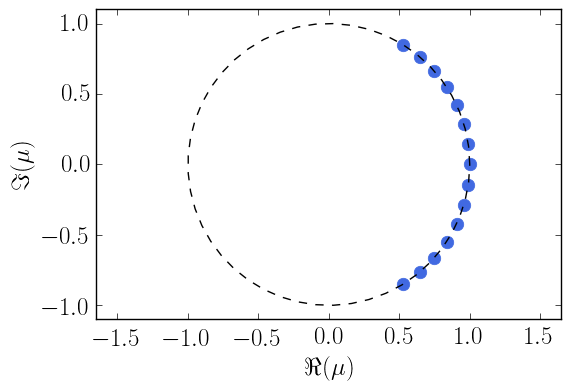

In [21]:
theta = linspace(0, 2*pi)
plot(mu.real, mu.imag, '.', color='royalblue', ms=18) ; axis('equal') ; xlim(-1.1, 1.1) ; ylim(-1.1, 1.1) ; plot(cos(theta), sin(theta), color='k', linestyle='--'); xlabel('$\Re(\mu)$') ; ylabel('$\Im(\mu)$') ;

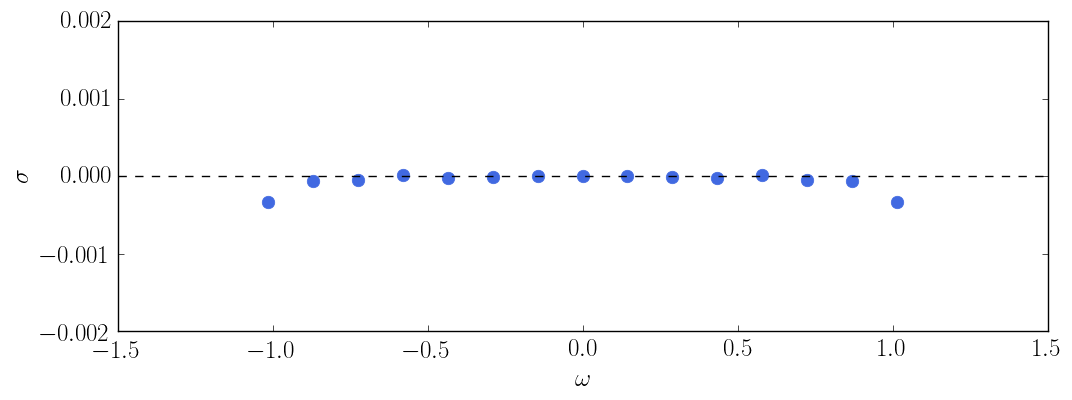

In [22]:
eigenvalues = log(mu) ; fig = plt.figure(figsize=(12, 4)) ; ax = fig.gca() ;
ax.plot(eigenvalues.imag, eigenvalues.real, '.', color='royalblue', ms=18) ; ax.axhline(0, color='k', linestyle='--') ;
ax.set_ylim(-0.002, 0.002) ; ax.locator_params(axis='y', nbins=5) ; ax.set_xlabel('$\omega$') ; ax.set_ylabel('$\sigma$') ;

In [23]:
ind = argsort(abs(eigenvalues)) ; mu = mu[ind] ; z = z[:, ind] ; eigenvalues = eigenvalues[ind]

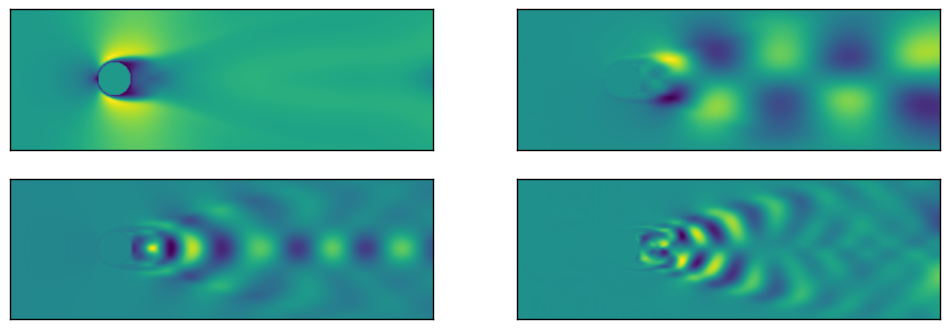

In [24]:
fig, ax = plt.subplots(2, 2, figsize=(12, 4))
ax[0, 0].imshow(z[:, 0].reshape(mean.shape).real, cmap=plt.cm.viridis) ; ax[0, 0].xaxis.set_visible(False) ; ax[0, 0].yaxis.set_visible(False)
ax[0, 1].imshow(z[:, 1].reshape(mean.shape).real, cmap=plt.cm.viridis) ; ax[0, 1].xaxis.set_visible(False) ; ax[0, 1].yaxis.set_visible(False)
ax[1, 0].imshow(z[:, 3].reshape(mean.shape).real, cmap=plt.cm.viridis) ; ax[1, 0].xaxis.set_visible(False) ; ax[1, 0].yaxis.set_visible(False)
ax[1, 1].imshow(z[:, 5].reshape(mean.shape).real, cmap=plt.cm.viridis) ; ax[1, 1].xaxis.set_visible(False) ; ax[1, 1].yaxis.set_visible(False)

<center><h2>What next?</h2></center>

These modal decompositions can serve multiple purposes :
    
- Extraction of coherent structures,
- Dimensionality reduction for reduced-order modeling,
- Compression for data storage,
- ...

POD and DMD are not the only two modal decomposition available in the literature. One can cite :

- Fourier decomposition,
- Spectral POD,
- Recursive-DMD,
- Extended-DMD,
- ...

The choice of the best decomposition is more an art that a science.

After the break, you will implement snapshot-based POD and the original Koopman algorithm yourself using either Matlab or Python.